In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('cleaned_sales.csv')

In [2]:
df.head()

,quantity,unit_price,discount,date,retail_price,product_name,area,city,total_sales,discounted_price,season,month
0,33,16.0,20.0,2021-10-29 03:33:52+00:00,16.0,product y,Bahary,North,528.0,12.80,Fall,10
1,30,16.0,20.0,2021-10-23 12:29:27+00:00,16.0,product y,Dar El-Salam,Cairo,480.0,12.80,Fall,10
2,2,45.0,30.0,2021-08-03 09:14:16+00:00,45.0,product z,Miamy,North,90.0,31.50,Summer,8
3,3,16.0,3.0,2021-08-17 09:00:50+00:00,16.0,product y,Miamy,North,48.0,15.52,Summer,8
4,1,45.0,27.0,2021-09-06 19:57:02+00:00,45.0,product z,Miamy,North,45.0,32.85,Fall,9


In [9]:
df.info()

<class 'pandas.core.series.Series'>
Index: 2827 entries, 2021-03-31 11:38:58+00:00 to 2023-01-17 09:24:09+00:00
Series name: total_sales
Non-Null Count  Dtype  
--------------  -----  
2827 non-null   float64
dtypes: float64(1)
memory usage: 108.7+ KB


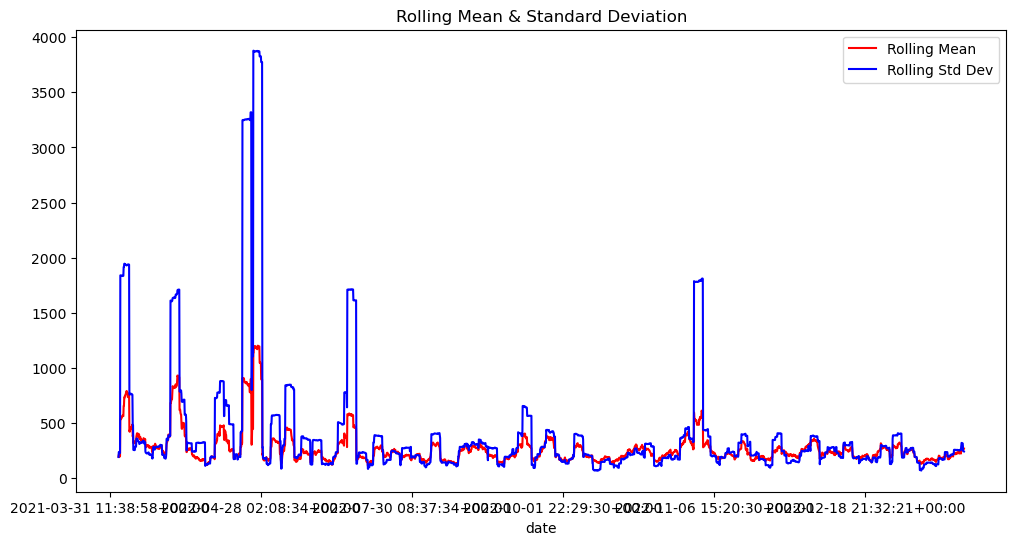

ADF Statistic: -15.54102930059067
p-value: 2.159246422728569e-28
Critical Values: {'1%': -3.4326726638430176, '5%': -2.862566191457111, '10%': -2.5673162728198173}
The data is stationary (reject null hypothesis).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Load the dataset
df = pd.read_csv('cleaned_sales.csv')

# Aggregate sales if needed (adjust this based on your dataset structure)
df = df.groupby('date')['total_sales'].sum()  # Change 'total_sales' if needed

# Plot rolling statistics
plt.figure(figsize=(12,6))
df.rolling(window=30).mean().plot(label='Rolling Mean', color='red')
df.rolling(window=30).std().plot(label='Rolling Std Dev', color='blue')
plt.legend()
plt.title("Rolling Mean & Standard Deviation")
plt.show()

# Augmented Dickey-Fuller Test
adf_test = adfuller(df)
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

# Check stationarity decision
if adf_test[1] < 0.05:
    print("The data is stationary (reject null hypothesis).")
else:
    print("The data is NOT stationary (fail to reject null). Differencing may be needed.")


C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


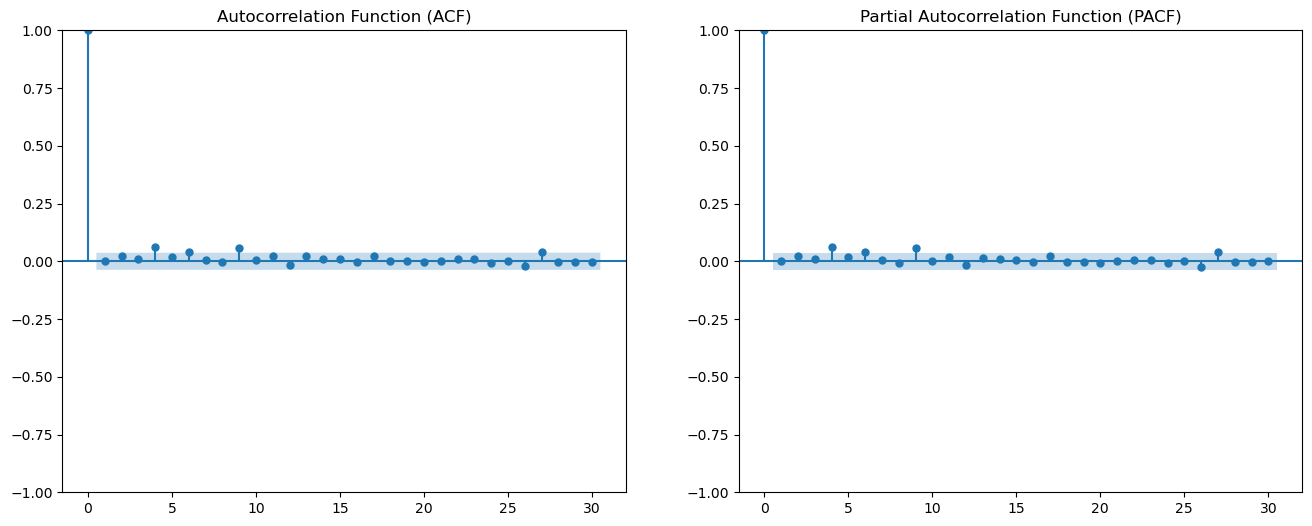

In [4]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# ACF (MA terms)
plot_acf(df, lags=30, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# PACF (AR terms)
plot_pacf(df, lags=30, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.show()


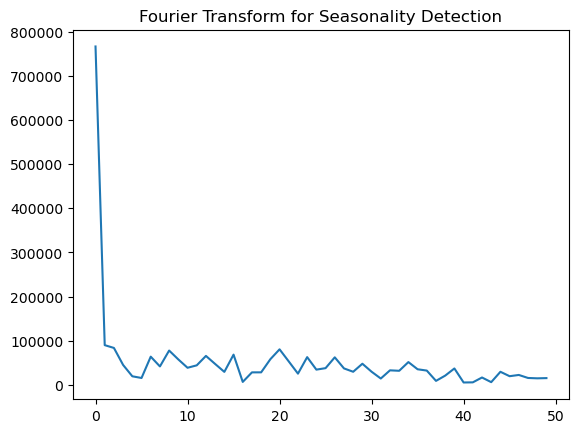

In [5]:
import numpy as np
from scipy.fftpack import fft

fft_vals = fft(df.values.flatten())
plt.plot(np.abs(fft_vals[:50]))  # Check dominant frequencies
plt.title("Fourier Transform for Seasonality Detection")
plt.show()


In [6]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Create an empty DataFrame to store forecasts
forecast_df = pd.DataFrame()

# Loop through each city
for city in df['city'].unique():
    city_data = df[df['city'] == city].set_index('date')  # Filter city data & set date index

    # Fit ARMA model (ARMA(1,1) based on analysis)
    model = ARIMA(city_data['total_sales'], order=(1,0,1))
    result = model.fit()

    # Forecast next 10 days
    forecast = result.forecast(steps=10)

    # Store results in DataFrame
    temp_df = pd.DataFrame({'date': pd.date_range(start=city_data.index[-1], periods=11, freq='D')[1:],  
                            'city': city,  
                            'forecasted_sales': forecast.values})
    
    forecast_df = pd.concat([forecast_df, temp_df])

# Reset index for readability
forecast_df.reset_index(drop=True, inplace=True)


KeyError: 'city'

In [10]:
print(df.columns)


AttributeError: 'Series' object has no attribute 'columns'

In [11]:
type(df)


pandas.core.series.Series

In [12]:
import pandas as pd

df = pd.read_csv("cleaned_sales.csv")  # Make sure it's the correct filename
print(df.head())  # Verify it loads properly


   quantity  unit_price  discount                       date  retail_price  \
0        33        16.0      20.0  2021-10-29 03:33:52+00:00          16.0   
1        30        16.0      20.0  2021-10-23 12:29:27+00:00          16.0   
2         2        45.0      30.0  2021-08-03 09:14:16+00:00          45.0   
3         3        16.0       3.0  2021-08-17 09:00:50+00:00          16.0   
4         1        45.0      27.0  2021-09-06 19:57:02+00:00          45.0   

  product_name          area   city  total_sales  discounted_price  season  \
0    product y        Bahary  North        528.0             12.80    Fall   
1    product y  Dar El-Salam  Cairo        480.0             12.80    Fall   
2    product z         Miamy  North         90.0             31.50  Summer   
3    product y         Miamy  North         48.0             15.52  Summer   
4    product z         Miamy  North         45.0             32.85    Fall   

   month  
0     10  
1     10  
2      8  
3      8  
4      

In [13]:
print(df.columns)


Index(['quantity', 'unit_price', 'discount', 'date', 'retail_price',
       'product_name', 'area', 'city', 'total_sales', 'discounted_price',
       'season', 'month'],
      dtype='object')


In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Create an empty DataFrame to store forecasts
forecast_df = pd.DataFrame()

# Loop through each city
for city in df['city'].unique():
    city_data = df[df['city'] == city].set_index('date')  # Filter city data & set date index

    # Fit ARMA model (ARMA(1,1) based on analysis)
    model = ARIMA(city_data['total_sales'], order=(1,0,1))
    result = model.fit()

    # Forecast next 10 days
    forecast = result.forecast(steps=10)

    # Store results in DataFrame
    temp_df = pd.DataFrame({'date': pd.date_range(start=city_data.index[-1], periods=11, freq='D')[1:],  
                            'city': city,  
                            'forecasted_sales': forecast.values})
    
    forecast_df = pd.concat([forecast_df, temp_df])

# Reset index for readability
forecast_df.reset_index(drop=True, inplace=True)


C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NV_USER\anaconda3

In [15]:
print(forecast_df)


                        date   city  forecasted_sales
0  2023-01-07 22:35:26+00:00  North        172.200126
1  2023-01-08 22:35:26+00:00  North        174.612940
2  2023-01-09 22:35:26+00:00  North        176.641707
3  2023-01-10 22:35:26+00:00  North        178.347555
4  2023-01-11 22:35:26+00:00  North        179.781883
5  2023-01-12 22:35:26+00:00  North        180.987910
6  2023-01-13 22:35:26+00:00  North        182.001973
7  2023-01-14 22:35:26+00:00  North        182.854628
8  2023-01-15 22:35:26+00:00  North        183.571565
9  2023-01-16 22:35:26+00:00  North        184.174388
10 2022-12-06 12:32:04+00:00  Cairo        614.300259
11 2022-12-07 12:32:04+00:00  Cairo        375.172230
12 2022-12-08 12:32:04+00:00  Cairo        361.237927
13 2022-12-09 12:32:04+00:00  Cairo        360.425957
14 2022-12-10 12:32:04+00:00  Cairo        360.378643
15 2022-12-11 12:32:04+00:00  Cairo        360.375886
16 2022-12-12 12:32:04+00:00  Cairo        360.375725
17 2022-12-13 12:32:04+00:00

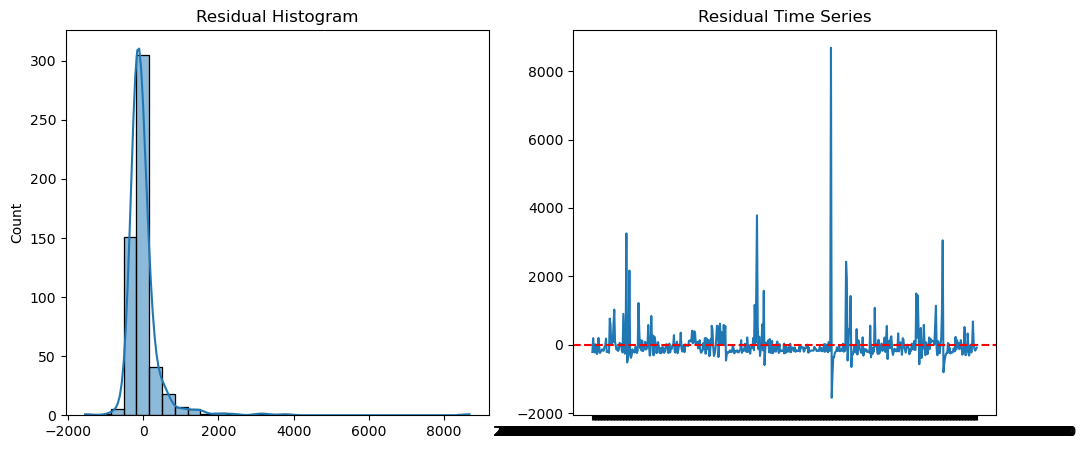

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get residuals (difference between actual & predicted values)
residuals = result.resid  

# Plot Residuals
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual Histogram")

plt.subplot(1,2,2)
plt.plot(residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Time Series")
plt.show()


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Forecast same time range as actual data for comparison
train_size = int(len(df) * 0.8)  # Use 80% data for training
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Train ARIMA model
model = ARIMA(train['total_sales'], order=(1,0,1))
result = model.fit()

# Predict test set
test['predicted_sales'] = result.forecast(steps=len(test))

# Compute error metrics
mae = mean_absolute_error(test['total_sales'], test['predicted_sales'])
rmse = np.sqrt(mean_squared_error(test['total_sales'], test['predicted_sales']))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 256.8785428918426
RMSE: 1166.8560251172114


C:\Users\NV_USER\AppData\Local\Temp\ipykernel_22860\1926037532.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['predicted_sales'] = result.forecast(steps=len(test))


In [19]:
print(df['total_sales'].mean())


257.15246561556523


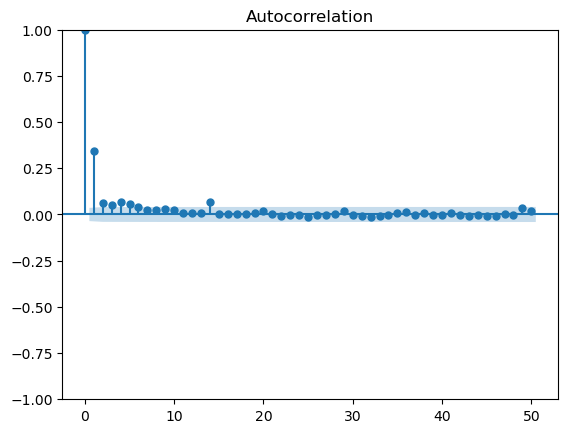

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load data
df = pd.read_csv("cleaned_sales.csv")

# Ensure it's a datetime index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Check seasonal ACF
sm.graphics.tsa.plot_acf(df['total_sales'], lags=50)
plt.show()


C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


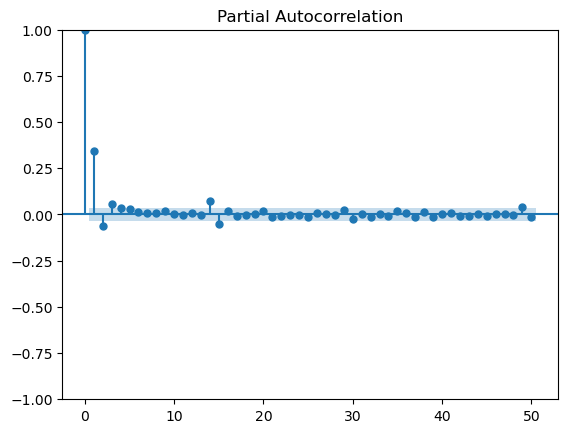

In [21]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.graphics.tsa.plot_pacf(df['total_sales'], lags=50)
plt.show()


In [23]:

df = pd.read_csv("cleaned_sales.csv")  

df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


In [25]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd

# Dictionary to store forecasts
city_forecasts = {}

# Get unique cities
cities = df['city'].unique()

# Loop through each city
for city in cities:
    print(f"Training SARIMA for {city}...")

    # Filter data for the city
    city_data = df[df['city'] == city]['total_sales']
    
    # Fit SARIMA model
    model = SARIMAX(city_data, order=(1,1,1), seasonal_order=(1,1,1,7))
    result = model.fit()

    # Forecast next 10 days
    forecast = result.forecast(steps=10)
    
    # Store forecast
    city_forecasts[city] = forecast.values  # Use .values to avoid index mismatch

# Convert to DataFrame (transpose to match correct format)
forecast_df = pd.DataFrame(city_forecasts, index=pd.date_range(start=df.index.max() + pd.Timedelta(days=1), periods=10))

print(forecast_df)


Training SARIMA for North...


C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NV_USER\anaconda3

Training SARIMA for Cairo...


C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\NV_USER\anaconda3\lib\site-packages\st

Training SARIMA for Giza...
                                North       Cairo        Giza
2023-01-18 09:24:09+00:00  239.935765  571.142908  273.943030
2023-01-19 09:24:09+00:00  195.823690  519.364778  345.673278
2023-01-20 09:24:09+00:00  194.370514  393.627425  399.919660
2023-01-21 09:24:09+00:00  185.330989  492.076776  295.537507
2023-01-22 09:24:09+00:00  174.057120  560.664820  260.366557
2023-01-23 09:24:09+00:00  175.955670  665.833971  330.375681
2023-01-24 09:24:09+00:00  195.329415  356.661983  368.810408
2023-01-25 09:24:09+00:00  242.116195  339.226052  306.354024
2023-01-26 09:24:09+00:00  195.778213  431.589994  360.740376
2023-01-27 09:24:09+00:00  192.483212  362.476000  402.348547


C:\Users\NV_USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [28]:
print(forecast_df.shape)  # Should be (10, number_of_cities)


(10, 3)


<AxesSubplot:title={'center':'10-Day Sales Forecast for Each City'}>

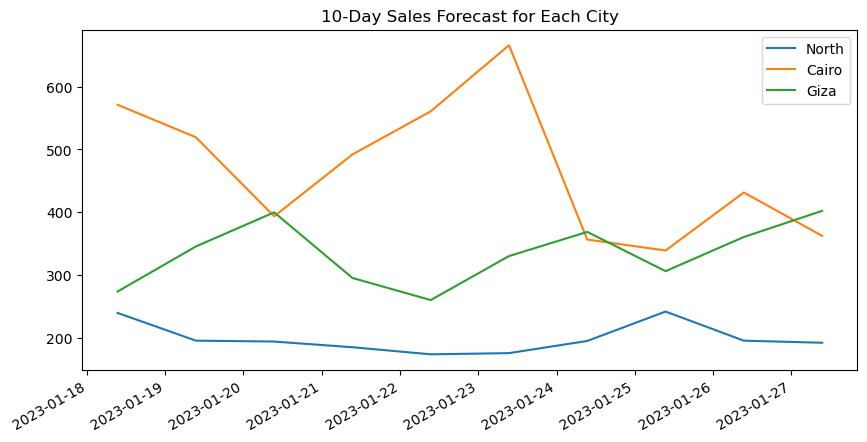

In [29]:
forecast_df.plot(figsize=(10,5), title="10-Day Sales Forecast for Each City")


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Initialize error dictionaries
mae_scores = {}
rmse_scores = {}

# Compare forecast with actual sales (if available)
for city in forecast_df.columns:
    # Get actual sales for the last 10 days (adjust index based on your dataset)
    actual_sales = df[df['city'] == city]['total_sales'].iloc[-10:].values
    predicted_sales = forecast_df[city].values

    # Calculate MAE and RMSE
    mae = mean_absolute_error(actual_sales, predicted_sales)
    rmse = np.sqrt(mean_squared_error(actual_sales, predicted_sales))

    # Store results
    mae_scores[city] = mae
    rmse_scores[city] = rmse

# Convert results to DataFrame
error_df = pd.DataFrame({'MAE': mae_scores, 'RMSE': rmse_scores})
print(error_df)


              MAE        RMSE
North  103.618878  115.371720
Cairo  206.880558  262.053738
Giza   185.050958  271.751570
